In [3]:
require(data.table)
require(ggplot2)
require(RColorBrewer)
options(repr.plot.width=20, repr.plot.height=15)

Loading required package: data.table

Loading required package: ggplot2

Loading required package: RColorBrewer



In [211]:
IBA=read.csv("~/Documents/Lenfest/MPA_Gaps_Overview_Figure_CSV/IBA_coverage_ecoregion_MPA.csv")
Redlist=read.csv("~/Documents/Lenfest/MPA_Gaps_Overview_Figure_CSV/OBIS_RedList_ecoregion_redo.csv")
OBIS=read.csv("~/Documents/Lenfest/MPA_Gaps_Overview_Figure_CSV/OBIS_summary_ecoregion.csv")
BIA=read.csv("~/Documents/Lenfest/MPA_Gaps_Overview_Figure_CSV/bia_coverage_ecoregion_MPA.csv")
coverage=read.csv("~/Documents/Lenfest/MPA_Gaps_Overview_Figure_CSV/coverage_ecoregion_MPA.csv")
depth=read.csv("~/Documents/Lenfest/MPA_Gaps_Overview_Figure_CSV/depth_coverage_bray_curtis_index.csv")
habitat=read.csv("~/Documents/Lenfest/MPA_Gaps_Overview_Figure_CSV/habitat_coverage_percents.csv")
prox=read.csv("~/Documents/Lenfest/MPA_Gaps_Overview_Figure_CSV/proximity_nearest5.csv")

In [208]:
head(depth)

,Ecoregion_ID,MPA_Bray_Curtis,FP_MPA_Bray_Curtis,Depth_Mean_Diff
,<int>,<dbl>,<dbl>,<dbl>
1,0,0.340468841,5.055092e-02,-1570.55005
2,1,0.090558310,2.195582e-04,72.77840
3,2,0.008396265,1.156148e-03,3401.44458
4,3,0.024935647,2.241669e-02,879.02045
5,4,0.160309434,2.258228e-05,-54.86816
6,5,0.000000000,0.000000e+00,NA


In [206]:
(OBIS[OBIS$NAME=="Acadian Atlantic",])

,Ecoregion_ID,Region,NAME,ER_Observations,ER_Outside_MPA_Observations,ER_MPA_Observations,ER_FP_MPA_Observations,Percent_OBS_MPA,Percent_OBS_FP_MPA,ER_Species,⋯,ER_MPA_Species,ER_FP_MPA_Species,Percent_Species_MPA,Percent_Species_FP_MPA,ER_Datasets,ER_Outside_MPA_Datasets,ER_MPA_Datasets,ER_FP_MPA_Datasets,Percent_Datasets_MPA,Percent_Datasets_FP_MPA
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,⋯,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
7,1,East Coast,Acadian Atlantic,368784,332161,36623,50,9.930745,0.01355807,600,⋯,437,5,72.83333,0.8333333,76,76,53,4,69.73684,5.263158


In [212]:
richness=merge(Redlist, OBIS)
richnesscov=merge(richness, coverage)

In [213]:
colnames(richnesscov)

[1] "Ecoregion_ID"                "NAME"                       
 [3] "ER_Species"                  "X"                          
 [5] "ER_RedList_Obs"              "ER_RedList_Species"         
 [7] "MPA_RedList_Obs"             "MPA_RedList_Species"        
 [9] "FP_MPA_RedList_Obs"          "FP_MPA_RedList_Species"     
[11] "Region"                      "ER_Observations"            
[13] "ER_Outside_MPA_Observations" "ER_MPA_Observations"        
[15] "ER_FP_MPA_Observations"      "Percent_OBS_MPA"            
[17] "Percent_OBS_FP_MPA"          "ER_Outside_MPA_Species"     
[19] "ER_MPA_Species"              "ER_FP_MPA_Species"          
[21] "Percent_Species_MPA"         "Percent_Species_FP_MPA"     
[23] "ER_Datasets"                 "ER_Outside_MPA_Datasets"    
[25] "ER_MPA_Datasets"             "ER_FP_MPA_Datasets"         
[27] "Percent_Datasets_MPA"        "Percent_Datasets_FP_MPA"    
[29] "ER.Area"                     "MPA.Coverage.Area"          
[31] "FP.MPA.Coverage.Area"        "PCT.Covered.by.MPA"         
[33] "PCT.Covered.by.FP.MPA"

In [214]:
richnesscov$NAME

[1] "Acadian Atlantic"                "Columbian Pacific"              
 [3] "Guam and Mariannas"              "Gulf Stream"                    
 [5] "Hawaiian Archipelago"            "Howland and Baker Islands"      
 [7] "Jarvis Island"                   "Montereyan Pacific Transition"  
 [9] "Northern Gulf of Mexico"         "Northern Gulf Stream Transition"
[11] "Palmyra Atoll"                   "Alaskan/Fjordland Pacific"      
[13] "South Florida/Bahamian Atlantic" "Southern Californian Pacific"   
[15] "Southern Gulf of Mexico"         "Virginian Atlantic"             
[17] "Wake Island"                     "Aleutian Archipelago"           
[19] "American Samoa"                  "Arctic Basin"                   
[21] "Beaufort/Chukchi Seas"           "Bering Sea"                     
[23] "Caribbean Sea"                   "Carolinian Atlantic"

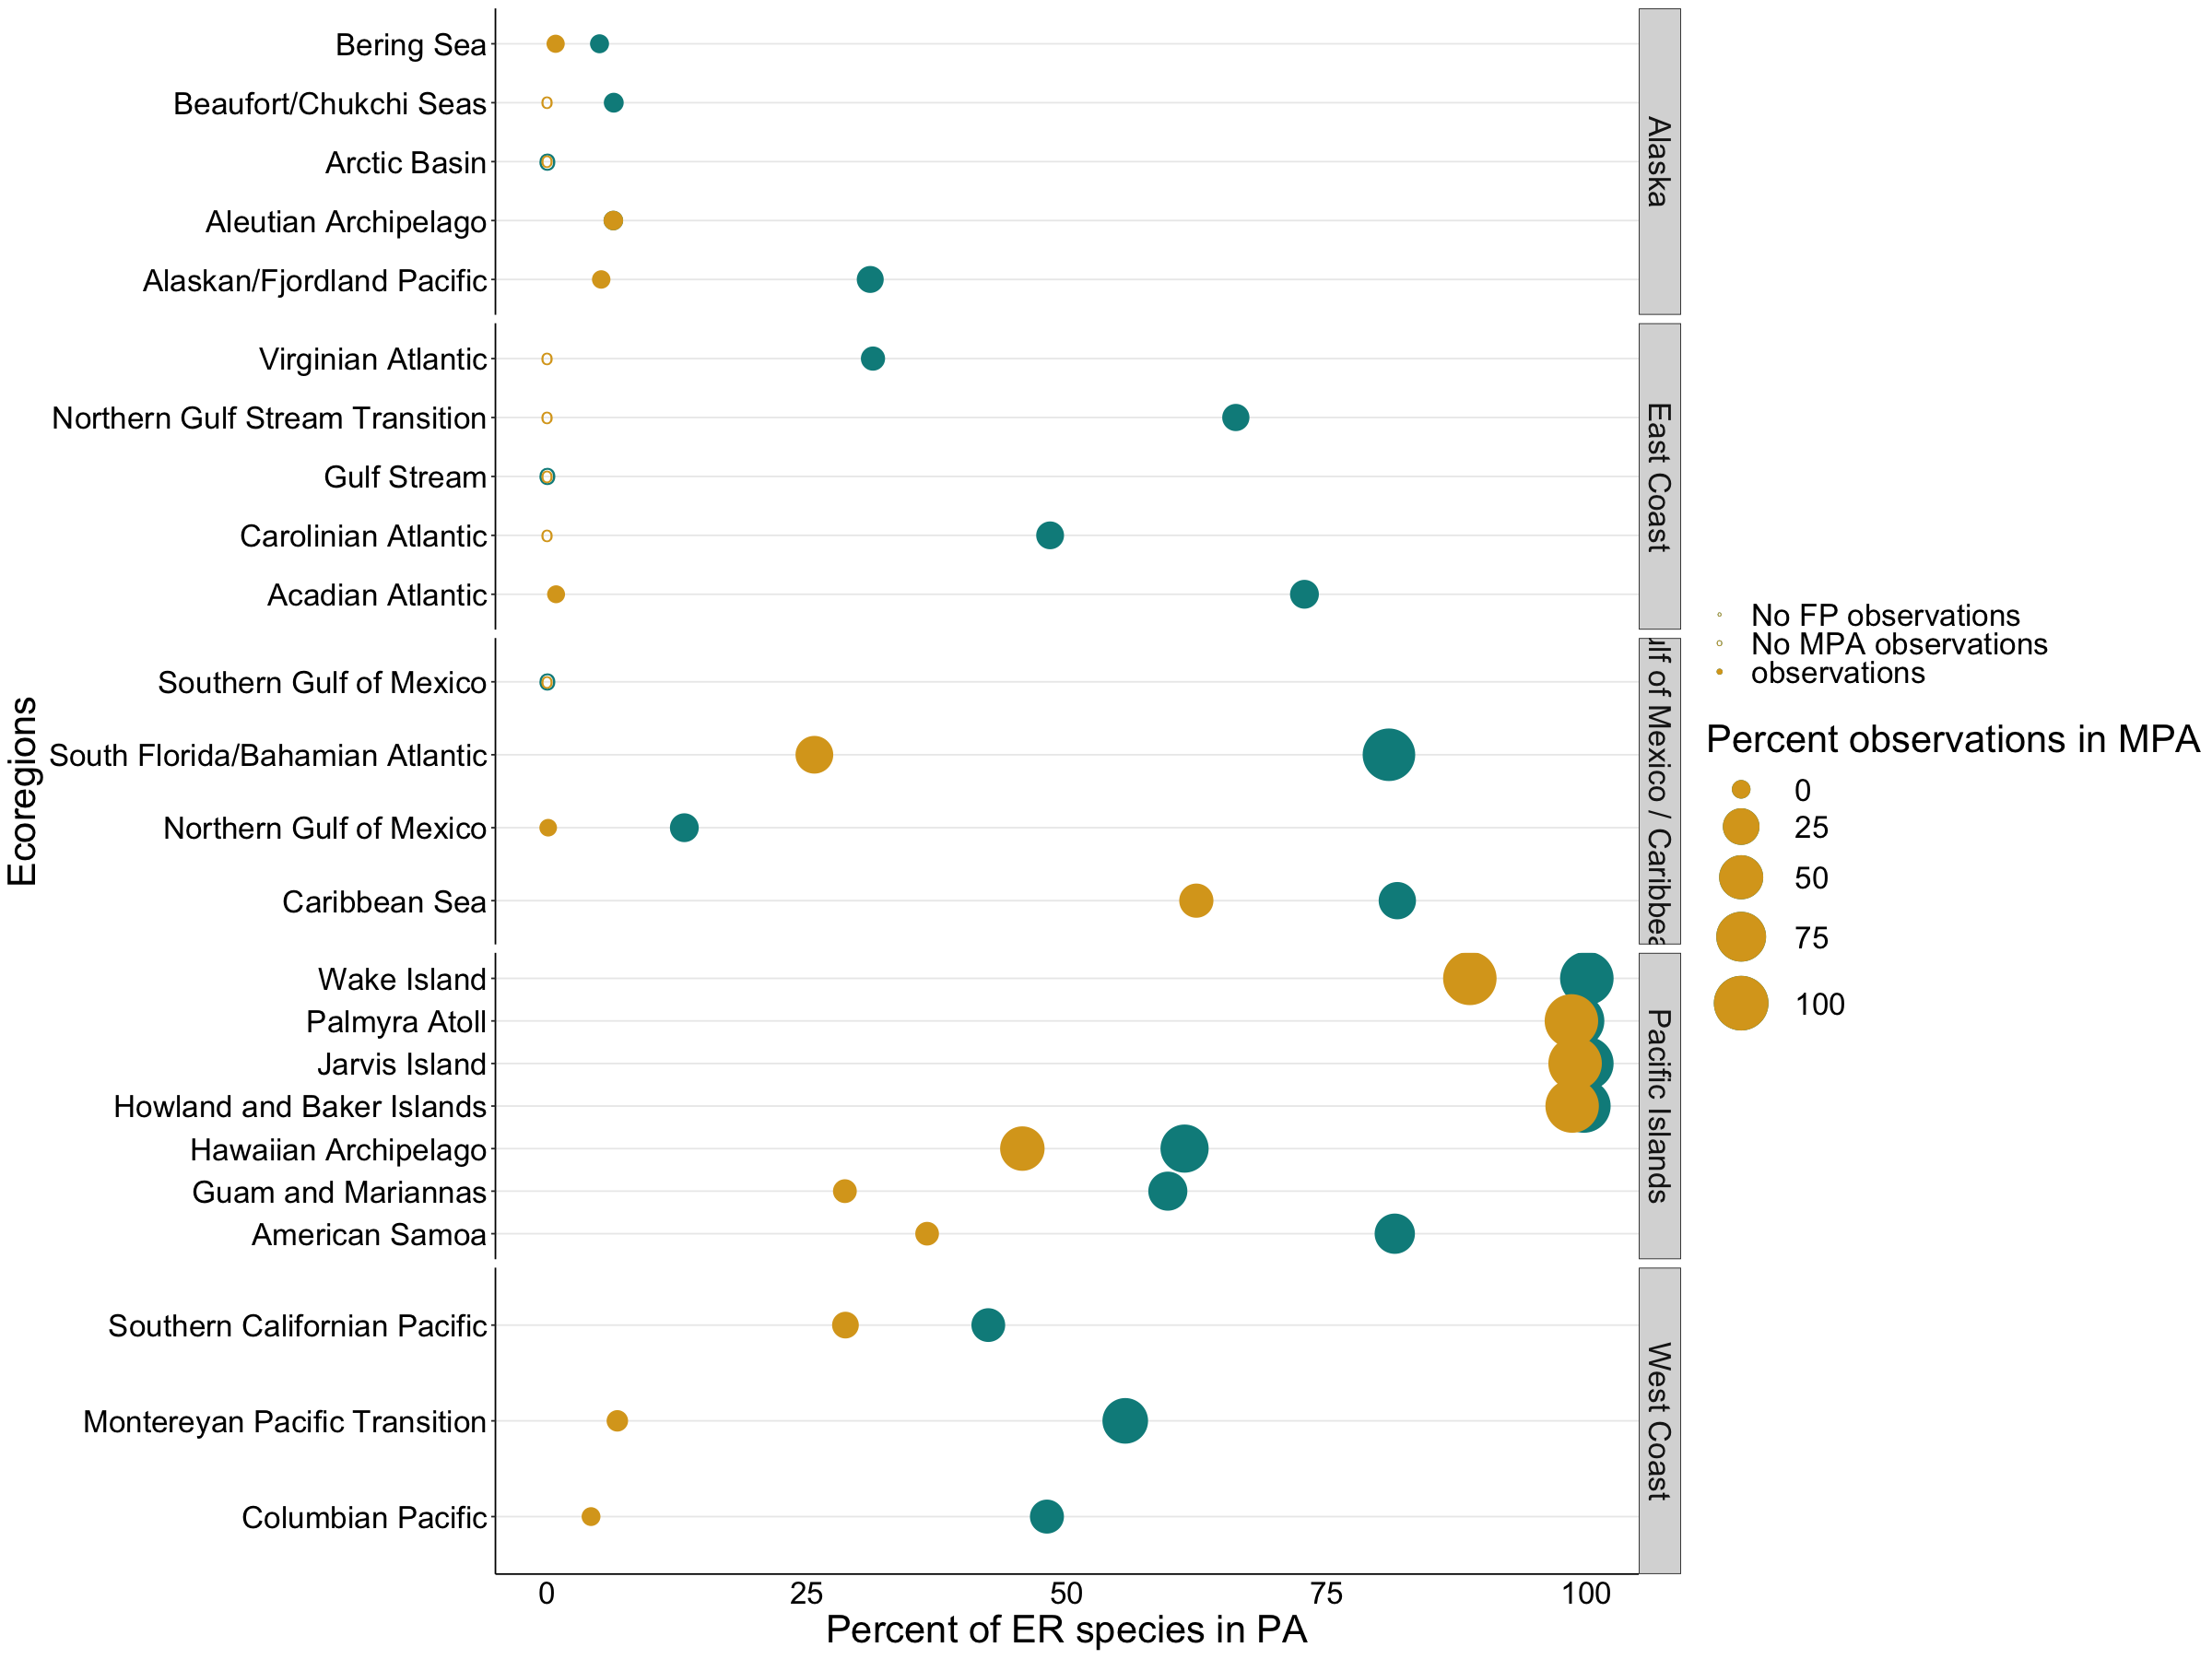

In [166]:
ggplot(richnesscov ) +
    geom_point(color="cyan4", aes(x = Percent_Species_MPA, y = NAME, size= Percent_OBS_MPA, shape=ifelse(Percent_OBS_MPA==0, "No MPA observations", "observations")))+
    geom_point(color="goldenrod", aes(x = Percent_Species_FP_MPA, y = NAME, size=Percent_OBS_FP_MPA, shape=ifelse(Percent_OBS_FP_MPA==0, "No FP observations", "observations")))+
scale_size_continuous(range = c(5, 16))+
scale_shape_manual(values=c(111,79, 16))+
       #geom_line()+
facet_grid(Region~., scales="free")+
theme_bw()+
labs(x="Percent of ER species in PA", shape="", size="Percent observations in MPA")+
theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=25))+
ylab("Ecoregions")
       

In [ ]:
richnesscov$species_obs=richnesscov$

In [210]:
colnames(richnesscov)

[1] "Ecoregion_ID"                "NAME"                       
 [3] "ER_Species"                  "ER_RedList_Obs"             
 [5] "ER_RedList_Species"          "MPA_RedList_Obs"            
 [7] "MPA_RedList_Species"         "FP_MPA_RedList_Obs"         
 [9] "FP_MPA_RedList_Species"      "Region"                     
[11] "ER_Observations"             "ER_Outside_MPA_Observations"
[13] "ER_MPA_Observations"         "ER_FP_MPA_Observations"     
[15] "Percent_OBS_MPA"             "Percent_OBS_FP_MPA"         
[17] "ER_Outside_MPA_Species"      "ER_MPA_Species"             
[19] "ER_FP_MPA_Species"           "Percent_Species_MPA"        
[21] "Percent_Species_FP_MPA"      "ER_Datasets"                
[23] "ER_Outside_MPA_Datasets"     "ER_MPA_Datasets"            
[25] "ER_FP_MPA_Datasets"          "Percent_Datasets_MPA"       
[27] "Percent_Datasets_FP_MPA"     "ER.Area"                    
[29] "MPA.Coverage.Area"           "FP.MPA.Coverage.Area"       
[31] "PCT.Covered.by.MPA"          "PCT.Covered.by.FP.MPA"      
[33] "dif_percent_obs_cov"         "dif_percent_FP_obs_cov"

In [221]:
#make percent redlist observations
richnesscov$Percent_Redlist_OBS_MPA=(richnesscov$MPA_RedList_Obs/richnesscov$ER_RedList_Obs)*100
richnesscov$Percent_Redlist_OBS_FP_MPA=(richnesscov$FP_MPA_RedList_Obs/richnesscov$ER_RedList_Obs)*100

In [225]:
#make percent redlist species
richnesscov$Percent_Redlist_Species_MPA=(richnesscov$MPA_RedList_Species/richnesscov$ER_RedList_Species)*100
richnesscov$Percent_Redlist_Species_FP_MPA=(richnesscov$FP_MPA_RedList_Species/richnesscov$ER_RedList_Species)*100


In [224]:
richnesscov$Percent_Redlist_Species_MPA

[1]  65.90909  51.61290  57.57576        NA  88.23529 100.00000 100.00000
 [8]  72.22222  35.48387  55.93220 100.00000  50.00000  87.50000  53.12500
[15]        NA  48.61111 100.00000  10.00000  78.26087        NA  60.00000
[22]  17.64706  52.00000  21.21212

In [216]:
richnesscov[richnesscov$MPA_RedList_Obs>richnesscov$PCT.Covered.by.MPA,]

,Ecoregion_ID,NAME,ER_Species,X,ER_RedList_Obs,ER_RedList_Species,MPA_RedList_Obs,MPA_RedList_Species,FP_MPA_RedList_Obs,FP_MPA_RedList_Species,⋯,ER_Outside_MPA_Datasets,ER_MPA_Datasets,ER_FP_MPA_Datasets,Percent_Datasets_MPA,Percent_Datasets_FP_MPA,ER.Area,MPA.Coverage.Area,FP.MPA.Coverage.Area,PCT.Covered.by.MPA,PCT.Covered.by.FP.MPA
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Acadian Atlantic,600,0,85551,44,6463,29,46,3,⋯,76,53,4,69.73684,5.263158,100762.16,4818.8113,5.212676e+00,4.7823623,0.005173248
2,10,Columbian Pacific,953,9,21855,31,3935,16,36,5,⋯,86,53,29,60.22727,32.954545,445698.93,10434.7214,1.615267e+02,2.3412040,0.036241224
3,11,Guam and Mariannas,898,10,1258,33,326,19,6,4,⋯,25,21,5,80.76923,19.230769,974230.27,248540.8682,8.534623e+00,25.5115117,0.000876038
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,13,Hawaiian Archipelago,801,12,2524,17,1360,15,670,8,⋯,97,59,17,59.00000,17.000000,2923629.35,1956311.9150,3.660015e+05,66.9138143,12.518737290
6,14,Howland and Baker Islands,354,13,515,8,398,8,382,7,⋯,3,6,5,100.00000,83.333333,435165.46,52000.4472,3.404044e+03,11.9495804,0.782241308
7,15,Jarvis Island,266,14,827,7,826,7,740,6,⋯,1,6,3,100.00000,50.000000,317966.37,316982.2981,1.752195e+03,99.6905094,0.551063094
8,16,Montereyan Pacific Transition,1189,15,15073,36,8952,26,264,14,⋯,62,67,37,83.75000,46.250000,274846.57,28151.6784,5.440251e+02,10.2426886,0.197937742
9,17,Northern Gulf of Mexico,1336,16,27269,31,1579,11,8,1,⋯,92,40,3,43.47826,3.260870,510220.82,8628.6307,4.352292e+00,1.6911561,0.000853021


In [183]:
richnesscov$dif_percent_obs_cov=richnesscov$Percent_OBS_MPA-richnesscov$PCT.Covered.by.MPA

In [182]:
richnesscov$dif_percent_FP_obs_cov=richnesscov$Percent_OBS_FP_MPA-richnesscov$PCT.Covered.by.FP.MPA

In [199]:
`richnesscov[richnesscov$dif_percent_ob<10,]

,Ecoregion_ID,NAME,ER_Species,ER_RedList_Obs,ER_RedList_Species,MPA_RedList_Obs,MPA_RedList_Species,FP_MPA_RedList_Obs,FP_MPA_RedList_Species,Region,⋯,ER_FP_MPA_Datasets,Percent_Datasets_MPA,Percent_Datasets_FP_MPA,ER.Area,MPA.Coverage.Area,FP.MPA.Coverage.Area,PCT.Covered.by.MPA,PCT.Covered.by.FP.MPA,dif_percent_obs_cov,dif_percent_FP_obs_cov
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,⋯,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Acadian Atlantic,600,85551,44,6463,29,46,3,East Coast,⋯,4,69.73684,5.263158,100762.2,4818.8113,5.212676e+00,4.7823623,0.005173248,5.1483831,0.008384824
4,12,Gulf Stream,200,13568,25,NA,NA,NA,NA,East Coast,⋯,0,0.00000,0.000000,308597.6,0.0000,0.000000e+00,0.0000000,0.000000000,0.0000000,0.000000000
5,13,Hawaiian Archipelago,801,2524,17,1360,15,670,8,Pacific Islands,⋯,17,59.00000,17.000000,2923629.4,1956311.9150,3.660015e+05,66.9138143,12.518737290,5.5082638,43.540414210
7,15,Jarvis Island,266,827,7,826,7,740,6,Pacific Islands,⋯,3,100.00000,50.000000,317966.4,316982.2981,1.752195e+03,99.6905094,0.551063094,0.3071520,99.233792616
9,17,Northern Gulf of Mexico,1336,27269,31,1579,11,8,1,Gulf of Mexico / Caribbean,⋯,3,43.47826,3.260870,510220.8,8628.6307,4.352292e+00,1.6911561,0.000853021,8.2134979,0.000298004
10,18,Northern Gulf Stream Transition,613,39592,59,1653,33,NA,NA,East Coast,⋯,0,36.36364,0.000000,207791.4,12630.5662,0.000000e+00,6.0784837,0.000000000,1.2199345,0.000000000
12,2,Alaskan/Fjordland Pacific,425,4018,14,391,7,2,2,Alaska,⋯,7,50.68493,9.589041,1701319.8,7022.8311,9.414154e+02,0.4127872,0.055334416,6.4828526,0.017390453
15,22,Southern Gulf of Mexico,84,2338,13,NA,NA,NA,NA,Gulf of Mexico / Caribbean,⋯,0,0.00000,0.000000,142959.1,0.0000,0.000000e+00,0.0000000,0.000000000,0.0000000,0.000000000
16,23,Virginian Atlantic,1210,159632,72,6678,35,NA,NA,East Coast,⋯,0,32.35294,0.000000,154701.7,3830.7463,6.324777e-01,2.4762144,0.000408837,0.9889042,-0.000408837


In [195]:
head(richnesscov)

,Ecoregion_ID,NAME,ER_Species,ER_RedList_Obs,ER_RedList_Species,MPA_RedList_Obs,MPA_RedList_Species,FP_MPA_RedList_Obs,FP_MPA_RedList_Species,Region,⋯,ER_FP_MPA_Datasets,Percent_Datasets_MPA,Percent_Datasets_FP_MPA,ER.Area,MPA.Coverage.Area,FP.MPA.Coverage.Area,PCT.Covered.by.MPA,PCT.Covered.by.FP.MPA,dif_percent_obs_cov,dif_percent_FP_obs_cov
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,⋯,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Acadian Atlantic,600,85551,44,6463,29,46,3,East Coast,⋯,4,69.73684,5.263158,100762.2,4818.811,5.212676e+00,4.782362,0.005173248,5.148383,0.008384824
2,10,Columbian Pacific,953,21855,31,3935,16,36,5,West Coast,⋯,29,60.22727,32.954545,445698.9,10434.721,1.615267e+02,2.341204,0.036241224,18.676066,0.102794323
3,11,Guam and Mariannas,898,1258,33,326,19,6,4,Pacific Islands,⋯,5,80.76923,19.230769,974230.3,248540.868,8.534623e+00,25.511512,0.000876038,10.346681,3.057613873
4,12,Gulf Stream,200,13568,25,NA,NA,NA,NA,East Coast,⋯,0,0.00000,0.000000,308597.6,0.000,0.000000e+00,0.000000,0.000000000,0.000000,0.000000000
5,13,Hawaiian Archipelago,801,2524,17,1360,15,670,8,Pacific Islands,⋯,17,59.00000,17.000000,2923629.4,1956311.915,3.660015e+05,66.913814,12.518737290,5.508264,43.540414210
6,14,Howland and Baker Islands,354,515,8,398,8,382,7,Pacific Islands,⋯,5,100.00000,83.333333,435165.5,52000.447,3.404044e+03,11.949580,0.782241308,87.795782,98.890663632


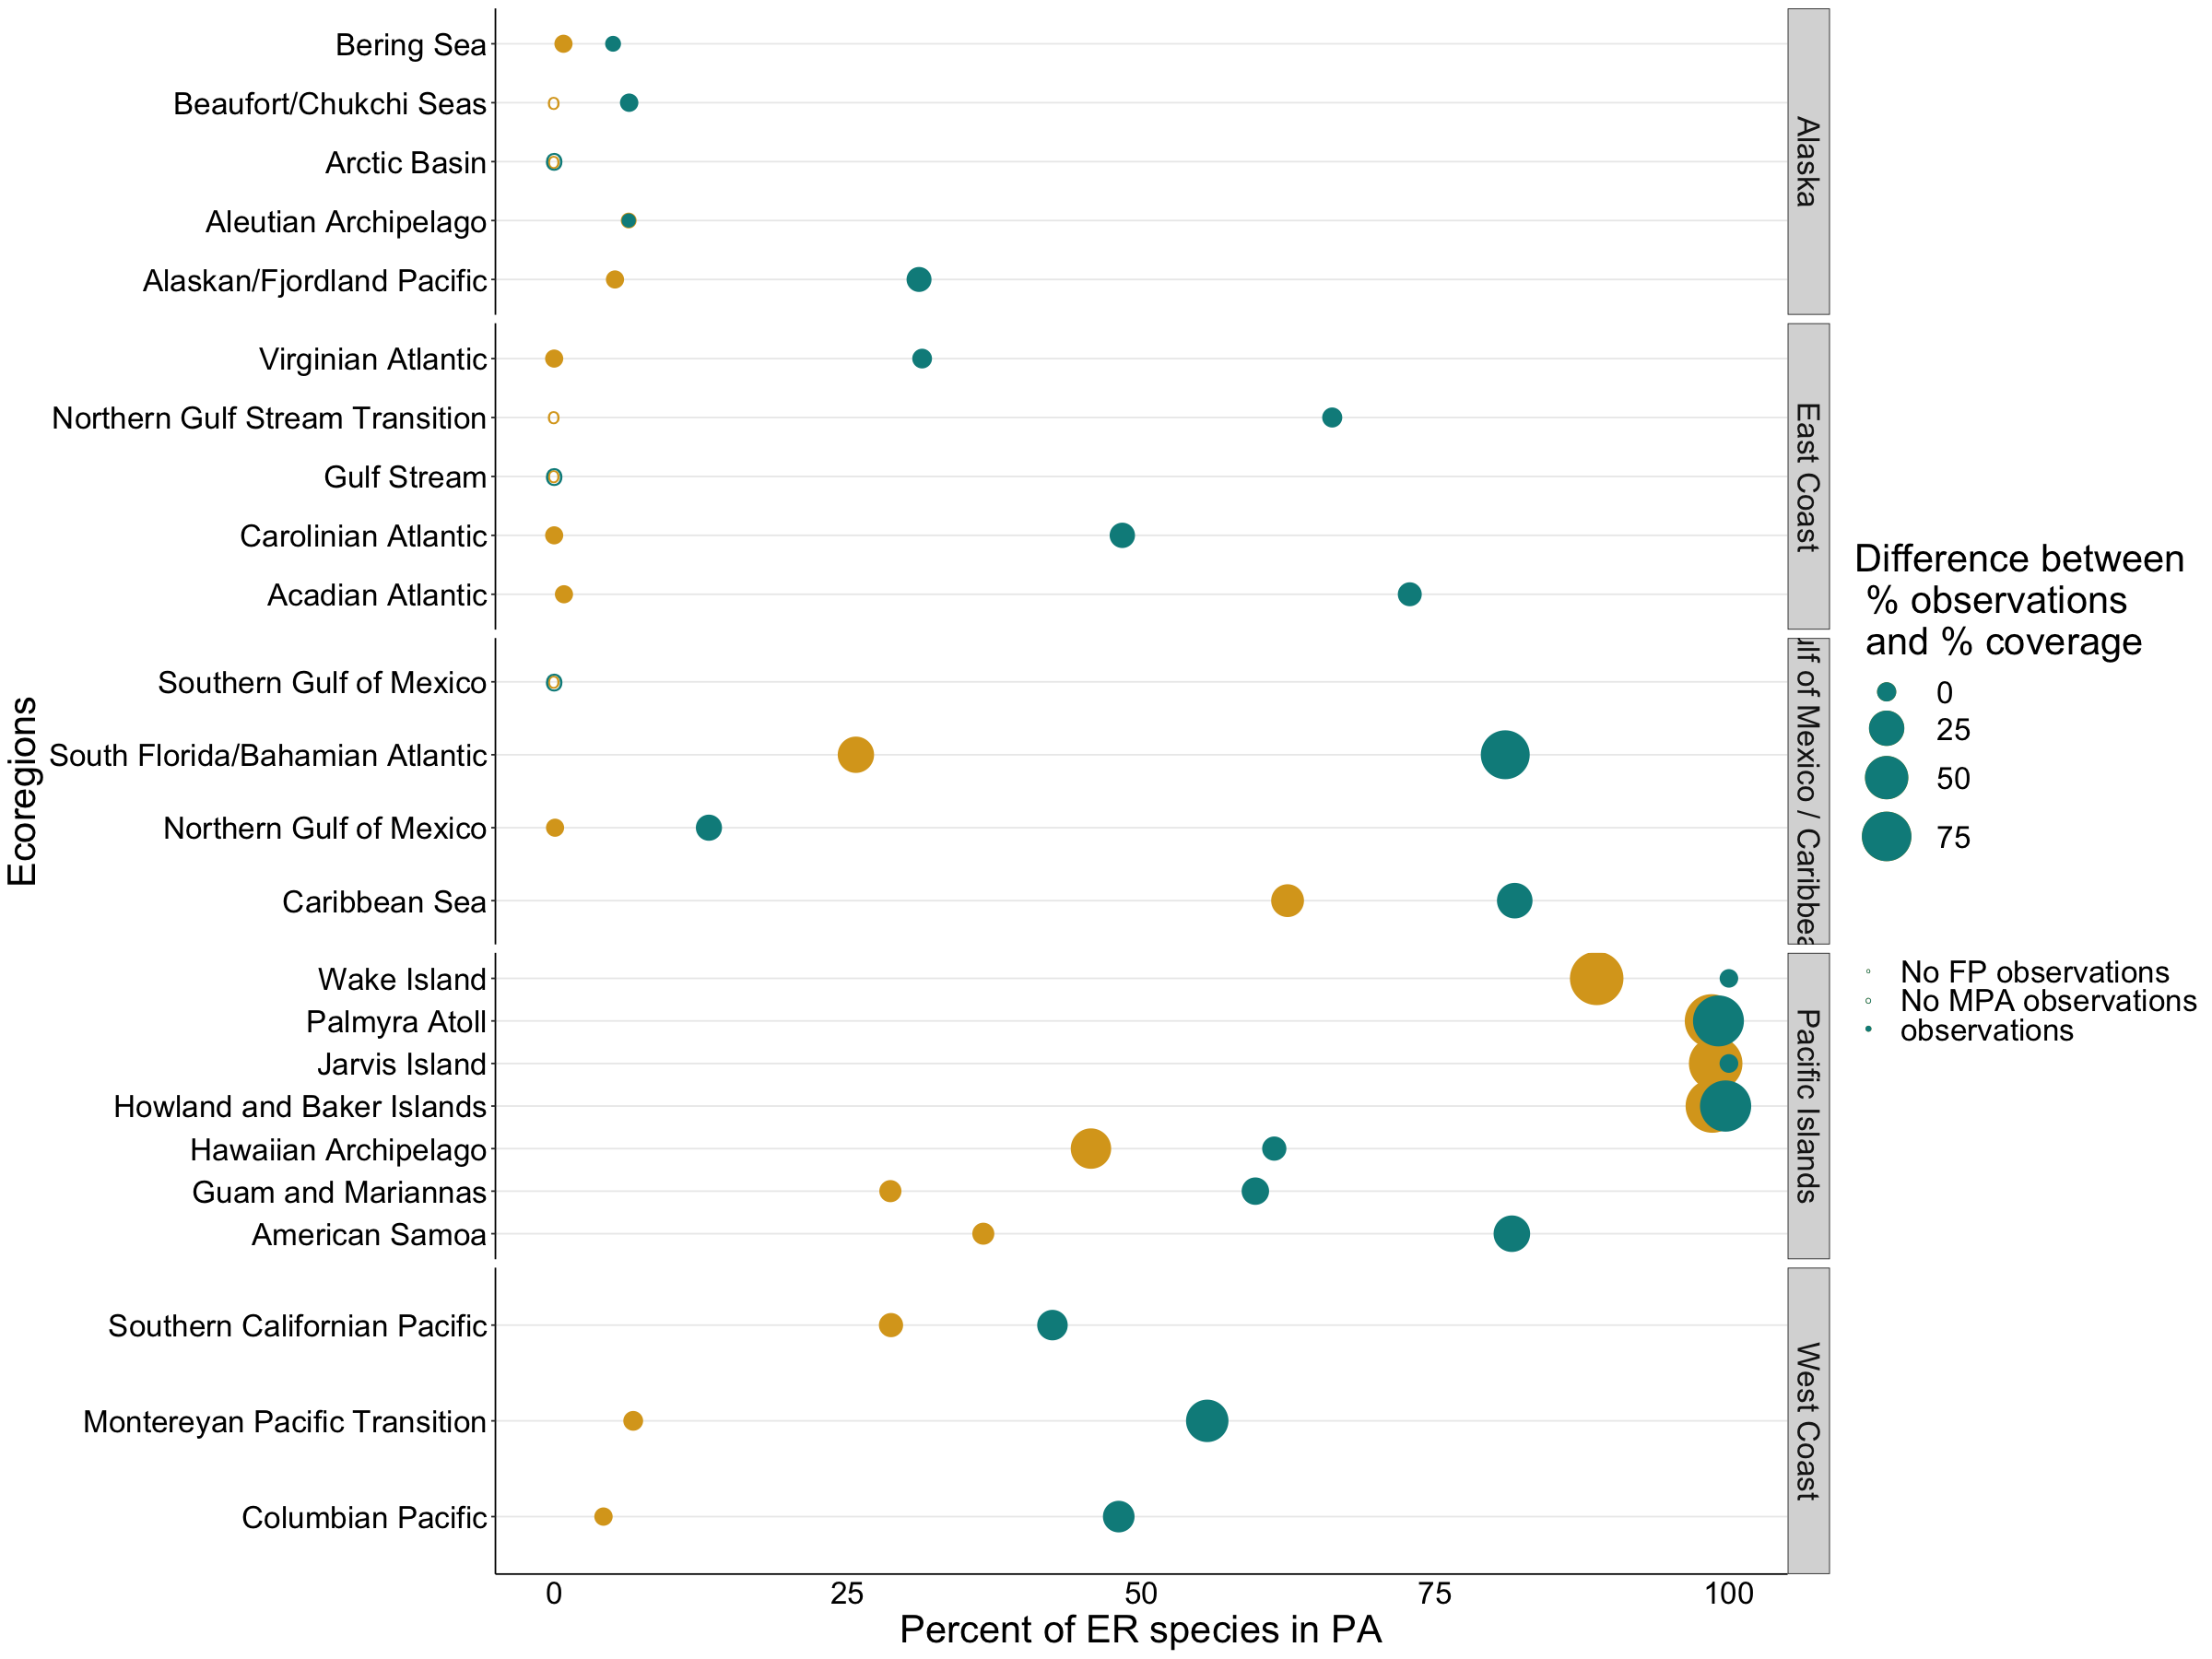

In [197]:
ggplot(richnesscov ) +
    geom_point(color="goldenrod", aes(x = Percent_Species_FP_MPA, y = NAME, size=dif_percent_FP_obs_cov, shape=ifelse(FP.MPA.Coverage.Area==0, "No FP observations", "observations")))+   
geom_point(color="cyan4", aes(x = Percent_Species_MPA, y = NAME, size= dif_percent_obs_cov, shape=ifelse(MPA.Coverage.Area==0, "No MPA observations", "observations")))+
scale_size_continuous(range = c(4, 16))+
scale_shape_manual(values=c(111,79, 16))+
       #geom_line()+
facet_grid(Region~., scales="free")+
theme_bw()+
labs(x="Percent of ER species in PA", shape="", size="Difference between \n % observations \n and % coverage")+
theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=25))+
ylab("Ecoregions")

In [ ]:
richnesscov$dif_percent_Redlist_obs_cov=richnesscov$Percent_Redlist_OBS_MPA-richnesscov$PCT.Covered.by.MPA
richnesscov$dif_percent_Redlist_FP_obs_cov=richnesscov$Percent_Redlist_OBS_FP_MPA-richnesscov$PCT.Covered.by.MPA


In [229]:
richnesscov[richnesscov$dif_percent_Redlist_obs_cov<0,]

,Ecoregion_ID,NAME,ER_Species,X,ER_RedList_Obs,ER_RedList_Species,MPA_RedList_Obs,MPA_RedList_Species,FP_MPA_RedList_Obs,FP_MPA_RedList_Species,⋯,MPA.Coverage.Area,FP.MPA.Coverage.Area,PCT.Covered.by.MPA,PCT.Covered.by.FP.MPA,Percent_Redlist_OBS_MPA,Percent_Redlist_OBS_FP_MPA,Percent_Redlist_Species_MPA,Percent_Redlist_Species_FP_MPA,dif_percent_Redlist_obs_cov,dif_percent_Redlist_FP_obs_cov
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,13,Hawaiian Archipelago,801,12,2524,17,1360,15,670,8,⋯,1956311.92,366001.4776,66.9138143,12.51873729,53.8827258,26.5451664,88.23529,47.05882,-13.0310885,-40.3686479
10,18,Northern Gulf Stream Transition,613,17,39592,59,1653,33,NA,NA,⋯,12630.57,0.0000,6.0784837,0.00000000,4.1750859,NA,55.93220,NA,-1.9033978,NA
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
18,3,Aleutian Archipelago,268,2,781,10,5,1,5,1,⋯,2457.59,2123.3975,1.3273070,1.14681457,0.6402049,0.6402049,10.00000,10.00000,-0.6871021,-0.6871021
NA.2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
22,7,Bering Sea,379,6,2706,17,12,3,10,3,⋯,12889.51,425.1868,0.9952433,0.03283012,0.4434590,0.3695492,17.64706,17.64706,-0.5517843,-0.6256942


Warning message:
“Removed 7 rows containing missing values (geom_point).”
Warning message:
“Removed 3 rows containing missing values (geom_point).”


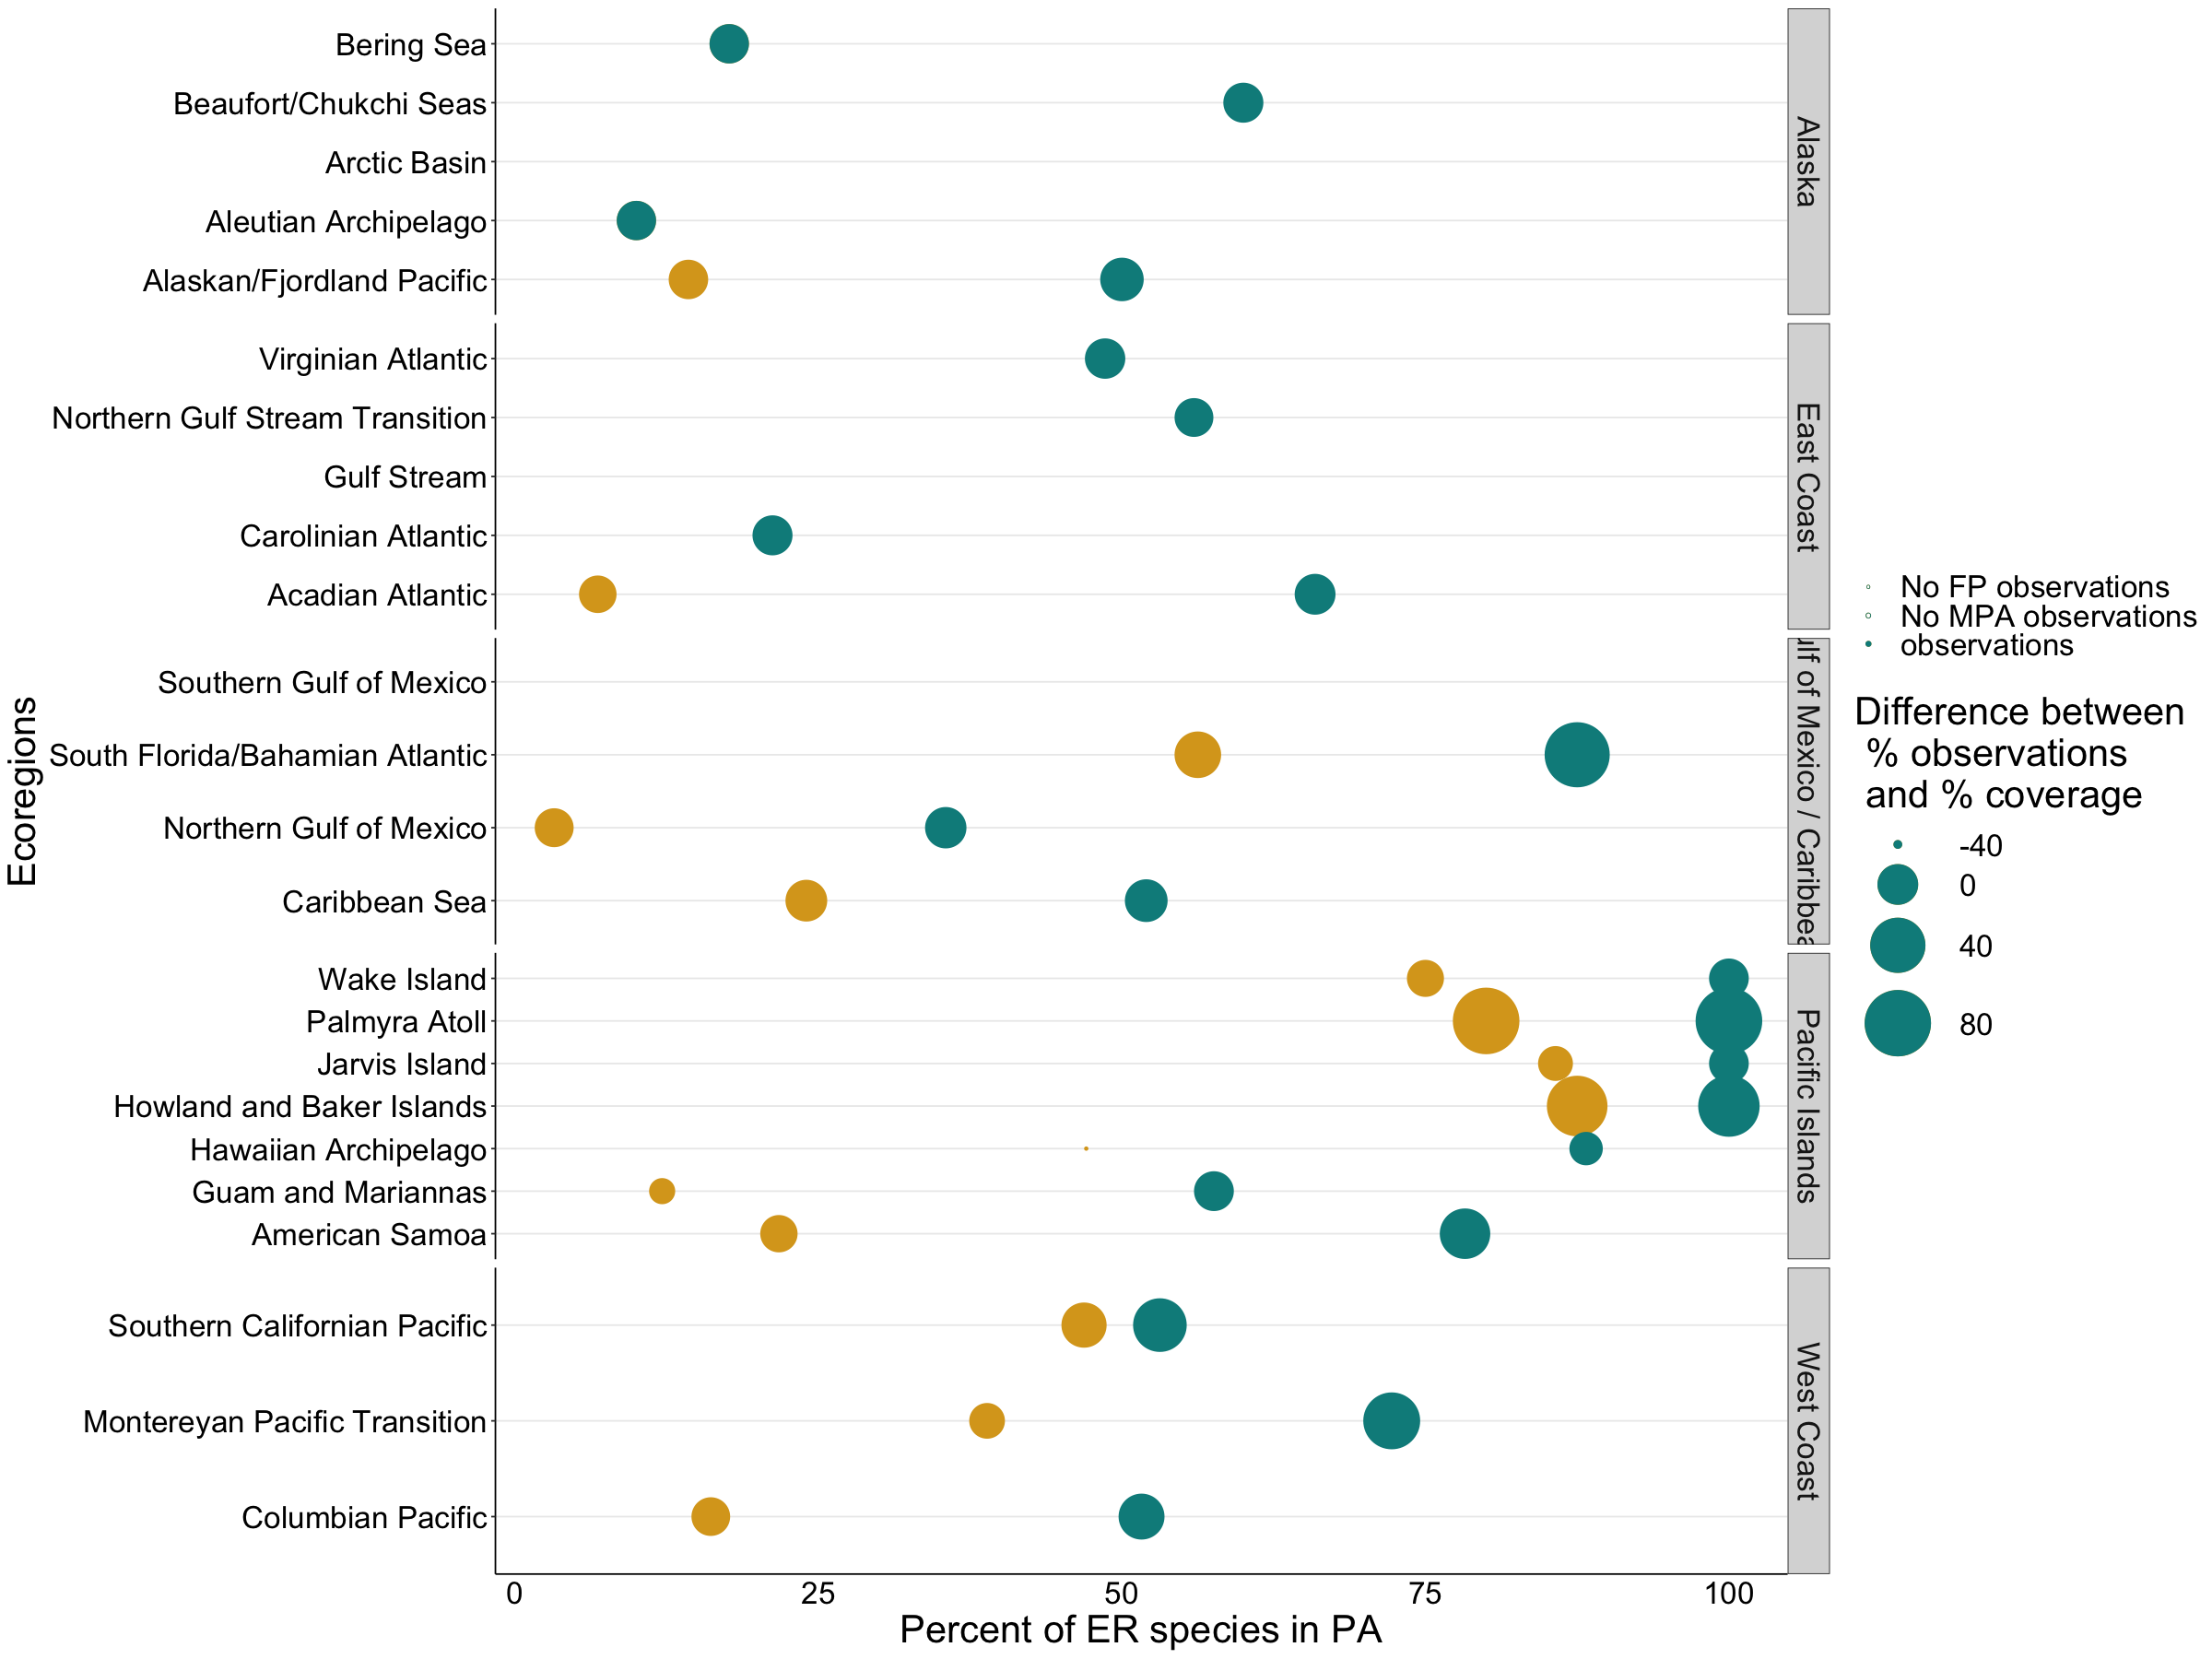

In [232]:
ggplot(richnesscov ) +
    geom_point(color="goldenrod", aes(x = Percent_Redlist_Species_FP_MPA, y = NAME, size=dif_percent_Redlist_FP_obs_cov, shape=ifelse(FP.MPA.Coverage.Area==0, "No FP observations", "observations")))+   
geom_point(color="cyan4", aes(x = Percent_Redlist_Species_MPA, y = NAME, size= dif_percent_Redlist_obs_cov, shape=ifelse(MPA.Coverage.Area==0, "No MPA observations", "observations")))+
scale_size_continuous(range = c(1, 20))+
scale_shape_manual(values=c(111,79, 16))+
       #geom_line()+
facet_grid(Region~., scales="free")+
theme_bw()+
labs(x="Percent of ER species in PA", shape="", size="Difference between \n % observations \n and % coverage")+
theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=25))+
ylab("Ecoregions")

Questions:
What does percent datasets mean (in richness table)?
Why is ER_species in the all obis records 6969 and in the redlist records 7213?
The MPA numbers include the FPA numbers, right? is that true for all datasets?
What does depth mean diff mean? is it the mean outside-mean inside mpas? 
why doesnt the IBA data include all of the ecoregions?

In [33]:
(coverage)

Ecoregion_ID,NAME,ER.Area,MPA.Coverage.Area,FP.MPA.Coverage.Area,PCT.Covered.by.MPA,PCT.Covered.by.FP.MPA
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,All Ecoregions,12223708.27,3186386.0527,3.834091e+05,26.0672619,3.136602e+00
13,Hawaiian Archipelago,2923629.35,1956311.9155,3.660015e+05,66.9138143,1.251874e+01
2,Alaskan/Fjordland Pacific,1701319.78,7022.8311,9.414154e+02,0.4127872,5.533442e-02
7,Bering Sea,1295111.91,12889.5145,4.251868e+02,0.9952433,3.283012e-02
11,Guam and Mariannas,974230.27,248540.8682,8.534623e+00,25.5115117,8.760376e-04
17,Northern Gulf of Mexico,510220.82,8628.6307,4.352292e+00,1.6911561,8.530213e-04
10,Columbian Pacific,445698.93,10434.7214,1.615267e+02,2.3412040,3.624122e-02
14,Howland and Baker Islands,435165.46,52000.4473,3.404044e+03,11.9495805,7.822413e-01
24,Wake Island,408528.99,407628.2706,2.024913e+03,99.7795219,4.956597e-01


In [32]:
IBA

Ecoregion_ID,NAME,ER.Area,IBA.Area.in.ER,IBA.Area.in.MPA,IBA.Area.in.FP.MPA,PCT.of.ER.Covered.by.IBA,PCT.of.ER.IBA.in.MPA,PCT.of.ER.IBA.in.FP.MPA
<int>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
0,All Ecoregions,11564360.15,979480.3443,595410.8121704629,380424.15993134194,8.4698188,60.788439058182945,38.839386839394756
13,Hawaiian Archipelago,2923629.35,392650.0251,392387.32837897533,365974.6978571756,13.4302259,99.93309648144586,93.20633503079443
7,Bering Sea,1295111.91,125748.3770,5110.813492467458,232.5032161894294,9.7094603,4.064317658245214,0.18489559999601557
2,Alaskan/Fjordland Pacific,1701319.78,78089.1147,5027.7651455218565,486.9283542429997,4.5899140,6.438496796464169,0.623554712314574
3,Aleutian Archipelago,185156.13,63040.6105,1509.8325169710688,1349.7052319819145,34.0472716,2.3950156962974907,2.141009138190043
6,Beaufort/Chukchi Seas,276280.28,49301.1767,653.4070836389105,--,17.8446236,1.3253377049051698,--
14,Howland and Baker Islands,435165.46,40380.0733,40378.95598362322,3404.0440206509575,9.2792458,99.99723305241403,8.430009517625138
11,Guam and Mariannas,974230.27,31985.0560,15426.931180334297,1.54431272956734,3.2831105,48.23168408876615,0.004828232059640137
19,Palmyra Atoll,400173.47,28759.0736,28759.073568899537,4143.124192257498,7.1866517,100.00000000003706,14.406320086539454


In [30]:
(IBA$ER.Area)

[1] 11564360.15  2923629.35  1295111.91  1701319.78   185156.13   276280.28
 [7]   435165.46   974230.27   400173.47   408528.99   317966.37   510220.82
[13]   274846.57   445698.93   406792.48   103308.60   154701.72    83748.62
[19]   100762.16   226486.81   127879.09   212352.33

In [11]:
datalist=list(IBA, Redlist, OBIS, BIA, coverage, depth, habitat, prox)

In [24]:
data_all <- Reduce(
  function(x, y) merge(x, y, all=TRUE, by=c("Ecoregion_ID")),
  datalist
)

Warning message in merge.data.frame(x, y, all = TRUE, by = c("Ecoregion_ID")):
“column names ‘NAME.x’, ‘NAME.y’ are duplicated in the result”
Warning message in merge.data.frame(x, y, all = TRUE, by = c("Ecoregion_ID")):
“column names ‘NAME.x’, ‘NAME.y’ are duplicated in the result”
Warning message in merge.data.frame(x, y, all = TRUE, by = c("Ecoregion_ID")):
“column names ‘NAME.x’, ‘NAME.y’, ‘ER.Area.x’, ‘ER.Area.y’ are duplicated in the result”
Warning message in merge.data.frame(x, y, all = TRUE, by = c("Ecoregion_ID")):
“column names ‘NAME.x’, ‘NAME.y’, ‘ER.Area.x’, ‘NAME.x’, ‘ER.Area.y’, ‘NAME.y’ are duplicated in the result”


In [25]:
head(data_all)

,Ecoregion_ID,NAME.x,ER.Area.x,IBA.Area.in.ER,IBA.Area.in.MPA,IBA.Area.in.FP.MPA,PCT.of.ER.Covered.by.IBA,PCT.of.ER.IBA.in.MPA,PCT.of.ER.IBA.in.FP.MPA,X.x,⋯,PCT.of.ER.Covered.by.Cetacean.Presence,PCT.of.ER.Cetacean.Presence.in.MPA,PCT.of.ER.Cetacean.Presence.in.FP.MPA,ER.Area.y,PCT.of.ER.Covered.by.Avian.Presence,PCT.of.ER.Avian.Presence.in.MPA,PCT.of.ER.Avian.Presence.in.FP.MPA,MPA_Near5_Mean,FP_MPA_Near5_Mean,NAME.y
,<int>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,⋯,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,0,All Ecoregions,11564360.1,979480.344,595410.8121704629,380424.15993134194,8.4698188,60.788439058182945,38.839386839394756,24,⋯,0.01386319,76.64048,0,983480.6,0.02192018,44.1315775,1.388095,18.652293510449034,39.550878682078526,All Ecoregions
2,1,Acadian Atlantic,100762.2,2666.933,2403.256906419488,0.3176201974319593,2.6467608,90.11312456689309,0.011909566696633225,0,⋯,0.01169797,89.71939,NA,100762.2,53.33801726,0.1979909,NA,34.048017897092976,58.156499828514896,Acadian Atlantic
3,2,Alaskan/Fjordland Pacific,1701319.8,78089.115,5027.7651455218565,486.9283542429997,4.5899140,6.438496796464169,0.623554712314574,1,⋯,NA,NA,NA,NA,NA,NA,NA,582.7374037826963,--,Alaskan/Fjordland Pacific
4,3,Aleutian Archipelago,185156.1,63040.611,1509.8325169710688,1349.7052319819145,34.0472716,2.3950156962974907,2.141009138190043,2,⋯,NA,NA,NA,NA,NA,NA,NA,--,--,Aleutian Archipelago
5,4,American Samoa,406792.5,18287.464,15827.20324122095,7.090566620220157,4.4955265,86.54673612519403,0.038772826058115564,3,⋯,NA,NA,NA,NA,NA,NA,NA,21.05658037876012,140.36942795943887,American Samoa
6,5,Arctic Basin,226486.8,2084.849,--,--,0.9205167,--,--,4,⋯,NA,NA,NA,NA,NA,NA,NA,--,--,Arctic Basin


In [17]:
data_all$Name.y=NULL
data_all$X.y=NULL
data_all$X.x=NULL


In [18]:
colnames(data_all)

[1] "Ecoregion_ID"                          
 [2] "NAME.x"                                
 [3] "ER.Area.x"                             
 [4] "IBA.Area.in.ER"                        
 [5] "IBA.Area.in.MPA"                       
 [6] "IBA.Area.in.FP.MPA"                    
 [7] "PCT.of.ER.Covered.by.IBA"              
 [8] "PCT.of.ER.IBA.in.MPA"                  
 [9] "PCT.of.ER.IBA.in.FP.MPA"               
[10] "NAME.y"                                
[11] "ER_Species.x"                          
[12] "ER_RedList_Obs"                        
[13] "ER_RedList_Species"                    
[14] "MPA_RedList_Obs"                       
[15] "MPA_RedList_Species"                   
[16] "FP_MPA_RedList_Obs"                    
[17] "FP_MPA_RedList_Species"                
[18] "Name"                                  
[19] "ER_Observations"                       
[20] "ER_Outside_MPA_Observations"           
[21] "ER_MPA_Observations"                   
[22] "ER_FP_MPA_Observations"                
[23] "Percent_OBS_MPA"                       
[24] "Percent_OBS_FP_MPA"                    
[25] "ER_Species.y"                          
[26] "ER_Outside_MPA_Species"                
[27] "ER_MPA_Species"                        
[28] "ER_FP_MPA_Species"                     
[29] "Percent_Species_MPA"                   
[30] "Percent_Species_FP_MPA"                
[31] "ER_Datasets"                           
[32] "ER_Outside_MPA_Datasets"               
[33] "ER_MPA_Datasets"                       
[34] "ER_FP_MPA_Datasets"                    
[35] "Percent_Datasets_MPA"                  
[36] "Percent_Datasets_FP_MPA"               
[37] "NAME.x"                                
[38] "ER.Area.y"                             
[39] "BIA.Area.in.ER"                        
[40] "BIA.Area.in.MPA"                       
[41] "BIA.Area.in.FP.MPA"                    
[42] "PCT.of.ER.Covered.by.BIA"              
[43] "PCT.of.ER.BIA.in.MPA"                  
[44] "PCT.of.ER.BIA.in.FP.MPA"               
[45] "NAME.y"                                
[46] "ER.Area.x"                             
[47] "MPA.Coverage.Area"                     
[48] "FP.MPA.Coverage.Area"                  
[49] "PCT.Covered.by.MPA"                    
[50] "PCT.Covered.by.FP.MPA"                 
[51] "MPA_Bray_Curtis"                       
[52] "FP_MPA_Bray_Curtis"                    
[53] "Depth_Mean_Diff"                       
[54] "NAME.x"                                
[55] "PCT.of.ER.Covered.by.CWC.Habitat"      
[56] "PCT.of.ER.CWC.Habitat.in.MPA"          
[57] "PCT.of.ER.CWC.Habitat.in.FP.MPA"       
[58] "PCT.of.ER.Covered.by.Seagrass"         
[59] "PCT.of.ER.Seagrass.in.MPA"             
[60] "PCT.of.ER.Seagrass.in.FP.MPA"          
[61] "PCT.of.ER.Covered.by.Mangrove"         
[62] "PCT.of.ER.Mangrove.in.MPA"             
[63] "PCT.of.ER.Mangrove.in.FP.MPA"          
[64] "PCT.of.ER.Covered.by.CR"               
[65] "PCT.of.ER.CR.in.MPA"                   
[66] "PCT.of.ER.CR.in.FP.MPA"                
[67] "PCT.of.ER.Covered.by.Cetacean.Presence"
[68] "PCT.of.ER.Cetacean.Presence.in.MPA"    
[69] "PCT.of.ER.Cetacean.Presence.in.FP.MPA" 
[70] "ER.Area.y"                             
[71] "PCT.of.ER.Covered.by.Avian.Presence"   
[72] "PCT.of.ER.Avian.Presence.in.MPA"       
[73] "PCT.of.ER.Avian.Presence.in.FP.MPA"    
[74] "MPA_Near5_Mean"                        
[75] "FP_MPA_Near5_Mean"                     
[76] "NAME.y"